# Living small in the city or large in the 'burbs?
## Exploring Salt Lake City's real estate prices to address the eternal question
#### Katherine Chandler, K2 Exploratory Data Analysis

In [254]:
import pandas as pd
import urllib.parse
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import datetime

## Background
I am a proponent of smaller homes, and recent anecdotal observations (and meandering dinner discussions) have made me curious about the relationship between the size of a home and its relative appreciation in value. My vocal family members maintain (with fist raised) 'You're better off owning a tiny home downtown than a mansion in the **'burbs**!!!'. Indeed, current hipster cannon asserts that bigger is *not* better when it comes to housing. While the merits of a modestly sized home go beyond the economic, I was curious about how the 'small-home' movement holds up to economic reality. Is a small urban home *really* a better investment than a large suburban home? I recently moved back to my hometown of Salt Lake City, and in an entirely self-serving selection process I elected to address this question using current and historical real estate prices in the Salt Lake City area.

## Questions for Exploration

I broke high level question into three discrete sub-questions:

* Are small homes more valuable (per square foot) than large homes?
* Is a small home downtown really more valuable than a large home in the 'burbs?
* Has the relative value of small urban homes increased more than that of large suburban homes?

## Data Sources

I found that many real estate services (like the local multiple listing service) obfuscate their HTML to hinder web scraping, and few real estate services provide free APIs. Because of these limitations, all of my data came from one source: the tried and true real estate marketplace Zillow. Zillow served as a great resource for both historical and current real estate data in the Salt Lake City area. 

#### Active Listing Data

Zillow maintains 9 different APIs, but these APIs require a call be made on an individual street address (rather than a bulk call like city or ZIP code). In order to generate comprehensive data on current active listings, I modified the [```scrapehero zillow.py```](https://gist.github.com/scrapehero/5f51f344d68cf2c022eb2d23a2f1cf95 "scrapehero") script to generate a csv file containing the listing features of all active listings for 27 unique Salt Lake City ZIP codes. The modified scraping script (```zillow.py```), the script to call the scraping script (```zillow_scraper_calls.py```), ZIP code list, and resulting csv listing file can be found in the ```'zillow_scraper'``` folder of this repository.

The scraped data set includes 841 unique listings containing information about listing type ('title'), address, city, state, ZIP code ('postal_code'), listed sale price (in USD), size (in square feet), bedroom/bathroom count, and the active listing URL.

#### Historical Housing Price Data

To obtain historical real estate prices, I used the 'Home Values' data sets provided in the [Zillow Research Data sets](https://www.zillow.com/research/data/ "Zillow Research Data") (downloaded data sets in the ```'zillow_research_home_values'``` folder of this repository). The 'Home Values' data sets are smoothed, seasonally adjusted aggregates of estimated real estate value cut by location (city, state, metro area) and a given housing type (single family, number of bedrooms, etc.). Estimated real estate value is measured as the Zillow Home Value Index (ZHVI), a home price index (in USD) computed based on proprietary statistical and machine learning models ([ZHVI methodology here](https://www.zillow.com/research/zhvi-methodology-6032/ "ZHVI methodology")). No Zillow research data set provides direct information about home square footage (size), so I used bedroom count as a size proxy for this section of the project. The ZHVI time series contains monthly data for the period from April 1996 to February 2018.

## Cleaning the Data

#### Active Listing Data

The full cleaning code and logic for the active listing data can be found in the 'Zillow_SLC_Current_Active_Listings' notebook in the 'analysis_notebooks' of this repository. In short, the price data was parsed and standardized; the unique listing 'zpid' (Zillow property identifier) was extracted from the URL link and saved as the data frame index; redundant and non-consistent city naming conventions were standardized; and the combined 'facts and features' field was parsed into discrete square footage and bed/bath counts.

I also generated several new features in the data: price per square foot (USD/sqft), 'neighborhood' (a granular geographic clustering of zip codes), 'region' (a broad geographic clustering of zip codes), and a size_type category. 'Small' is classified as less than 1200 sqft, 'medium' as 1200- 2400 sqft, and 'large' as greater than 2400 sqft. 

#### Historical Housing Price Data

The full pre-processing for the active listing data can be found in the 'Zillow_SLC_Historical_Data' notebook in the 'analysis_notebooks' of this repository. Since these data sets are published by Zillow, the data was relatively clean and data pre-processing mainly included filtering for housing types / ZIP codes of interest and assigning geographic categories ('neighborhood' and 'region').

## Exploring the Data

The cleaned and processed active listing data was saved to a csv file from the 'Zillow_SLC_Current_Active_Listings' processing notebook and imported for the analyses below. 

In [255]:
# importing the active listing data and reassigning 'zpid' as index

slc_active_listings = pd.read_csv('./zillow_slc_current_listings_processed.csv', sep=',')

slc_active_listings.set_index('zpid', inplace=True)

I started the analysis by getting a high level view of the real estate market in Salt Lake City. What neighborhoods are associated with the current active listings? What is the average size of a listed home in each neighborhood? What is the average price of a listed home in each neighborhood?

I split the city into 9 neighborhoods in 4 broad geographic regions: Central, East, North-West, and South. The entire Central geographic region is classified as the 'Downtown SLC' neighborhood; the East geographic region contains the neighborhoods 'Cottonwood', 'Emigration_Canyon', and 'Millcreek_Holladay'; the North_West geographic region contains the neighborhoods 'Murray', 'North_SLC', and 'West_Valley'; and the South geographic region contains the neighborhoods 'South_SLC' and 'Taylorsville_Midvale'.

In [256]:
# view neighborhoods by region
slc_active_listings.groupby(['region', 'neighborhood']).size()

region      neighborhood        
Central     Downtown_SLC            190
East        Cottonwood               91
            Emigration_Canyon        42
            Millcreek_Holladay      124
North_West  Murray                   38
            North_SLC                13
            West_Valley             139
South       South_SLC                74
            Taylorsville_Midvale     45
dtype: int64

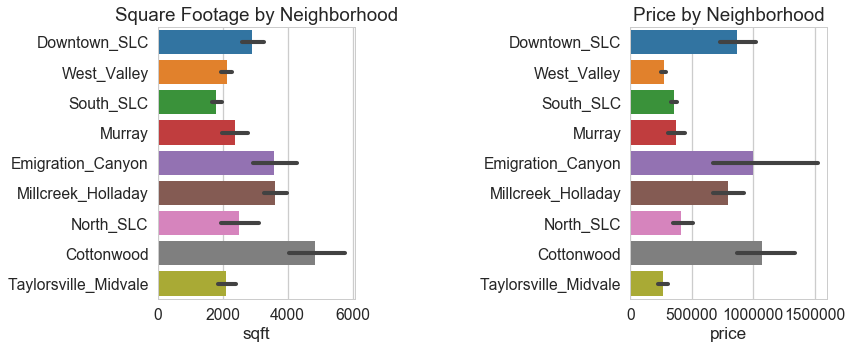

In [257]:
# plotting the sqft across all neighborhoods

fig = plt.figure(figsize=[12, 5])
sns.set_context("talk", font_scale=1.2)
sns.set_style("whitegrid")

fig.add_subplot(131)   #left
sns.barplot(y="neighborhood", x="sqft", data=slc_active_listings).set_title('Square Footage by Neighborhood')
plt.ylabel("")


fig.add_subplot(133)   #right
sns.barplot(y="neighborhood", x="price", data=slc_active_listings).set_title('Price by Neighborhood')
plt.ylabel("")

plt.show()

In [258]:
# adjusting display options to show all summarized data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# summarizing active listing data
slc_active_listings.groupby('neighborhood').describe()

baths                                                  beds                                               postal_code                                                                        price                                                                                  price_per_sqft                                                                                        sqft                                                                     
                      count      mean       std   min  25%  50%  75%   max  count      mean       std  min  25%  50%  75%   max       count          mean        std      min      25%      50%      75%      max  count          mean           std       min       25%       50%        75%         max          count        mean         std         min         25%         50%         75%          max  count         mean          std     min      25%     50%      75%      max
neighborhood                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Cottonwood             91.0  4.109890  2.474090  1.00  2.5  4.0  5.0  16.0   91.0  4.593407  1.556192  2.0  3.0  5.0  6.0   9.0        91.0  84121.000000   0.000000  84121.0  84121.0  84121.0  84121.0  84121.0   91.0  1.073400e+06  1.189662e+06  134000.0  449950.0  725000.0  1272500.0   9060000.0           91.0  239.260892  156.336734  125.468165  153.061578  173.422119  272.655251  1267.880364   91.0  4847.120879  4299.255150   860.0  2590.00  4382.0  5963.50  32463.0
Downtown_SLC          190.0  2.893421  1.675223  1.00  2.0  2.0  4.0   9.0  190.0  3.331579  1.620162  1.0  2.0  3.0  4.0  10.0       190.0  84103.610526   2.609688  84101.0  84102.0  84103.0  84105.0  84111.0  190.0  8.657588e+05  1.055849e+06   90000.0  339900.0  510095.0   894975.0   7950000.0          190.0  286.264694  113.530601  129.626381  216.958777  256.683508  328.758475   868.902439  190.0  2910.294737  2396.849700   471.0  1277.00  2069.5  3714.75  14879.0
Emigration_Canyon      42.0  3.184524  1.159609  1.75  2.0  3.0  4.0   6.0   42.0  3.833333  1.305087  2.0  3.0  4.0  5.0   8.0        42.0  84108.000000   0.000000  84108.0  84108.0  84108.0  84108.0  84108.0   42.0  9.978417e+05  1.589439e+06  319000.0  482462.5  699000.0   995000.0  10762200.0           42.0  253.721738  125.053985  124.543298  201.022079  220.840464  262.724128   924.111283   42.0  3584.095238  2192.376957  1300.0  2008.75  3005.5  4418.75  11646.0
Millcreek_Holladay    124.0  3.370968  1.376148  1.00  3.0  3.0  4.0   9.0  124.0  3.983871  1.175522  1.0  3.0  4.0  5.0   7.0       124.0  84116.354839   5.665749  84109.0  84109.0  84117.0  84124.0  84124.0  124.0  7.938477e+05  7.459193e+05   15000.0  399967.5  602450.0   949225.0   5485000.0          124.0  206.145760   86.341206   16.666667  156.041428  191.474243  230.388912   623.295455  124.0  3607.322581  1942.759995   680.0  2348.25  3096.0  4733.75  12980.0
Murray                 38.0  2.894737  1.034264  1.00  2.0  3.0  4.0   5.0   38.0  3.473684  1.202179  1.0  3.0  3.0  4.0   7.0        38.0  84107.000000   0.000000  84107.0  84107.0  84107.0  84107.0  84107.0   38.0  3.735842e+05  2.116622e+05   15000.0  226425.0  347400.0   428675.0    849900.0           38.0  158.966299   53.369268   22.796353  130.765224  159.369569  198.507345   270.925110   38.0  2377.578947  1258.710658   658.0  1320.50  2145.0  3019.75   5842.0
North_SLC              13.0  2.846154  0.688737  2.00  2.0  3.0  3.0   4.0   13.0  3.615385  0.960769  2.0  3.0  4.0  4.0   6.0        13.0  84064.846154  40.587038  84010.0  84054.0  84054.0  84114.0  84114.0   13.0  4.138687e+05

Of the current active listings with Salt Lake City ZIP codes, about 1/3 (36%) are downtown properties. Looking at a summary of the listing features shows some pretty big differences in size and list price by neighborhood. An 'average' Cottonwood home has 4.6 beds in hefty a 4750 sqft with a price-tag of \$1.05 million, while an 'average' home in West Valley is a more modest 3.6 beds in ~2100 sqft for just \$318,212.

This data highlights further regional geographic distinctions that can be made in the real estate listings. Suburban homes on Salt Lake City's east side (Cottonwood, Emigration Canyon, and Millcreek/Holladay) are large and expensive while suburban homes on Salt Lake City's west side (Murray, Taylorsville/Midvale, North Salt Lake, and West Valley) are small and cheap.

I plotted size (in square feet) and list price for active listings in the Central, East, North-West, and South regions of the city.

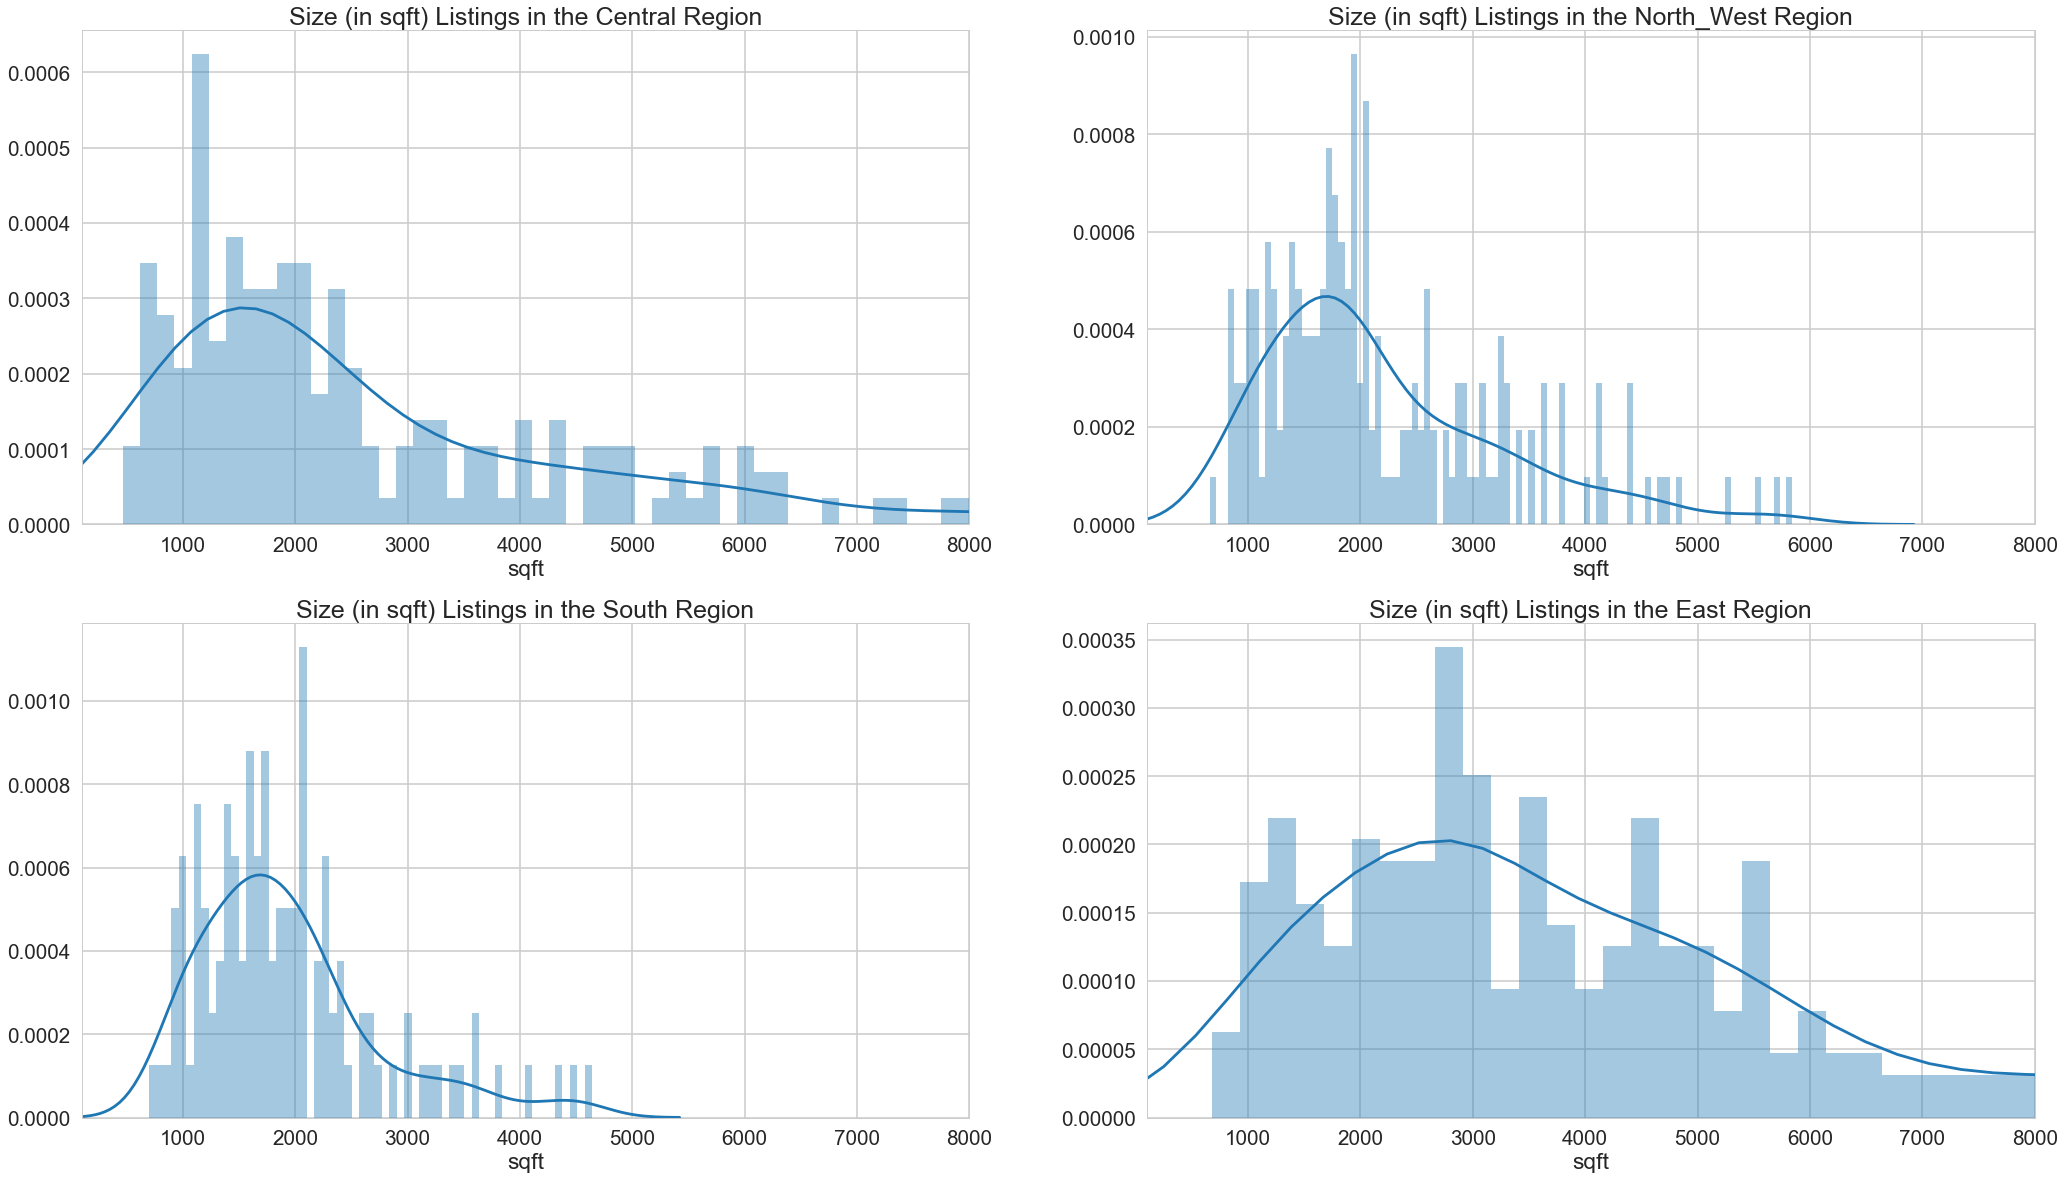

In [259]:
# plotting the size distribution by region

region_list = list(slc_active_listings['region'].unique())

#make the axes fonts bigger
fig = plt.figure(figsize=[35, 20])
sns.set_context("poster", font_scale=1.3)
sns.set_style("whitegrid")

sub_plot_num = 1

for region in region_list:
    region_listings = slc_active_listings[slc_active_listings['region'] == region]
    fig.add_subplot(2,2, sub_plot_num)
    x = .5
    lower = 100
    upper = 8000
    bins = int(len(slc_active_listings[slc_active_listings['region']==region])*x)
    plot1 = region_listings['sqft']
    sns.distplot(plot1, bins=bins, kde=True)
    plt.title('Size (in sqft) Listings in the {} Region'.format(region))
    plt.xlim(lower, upper)
    sub_plot_num +=1

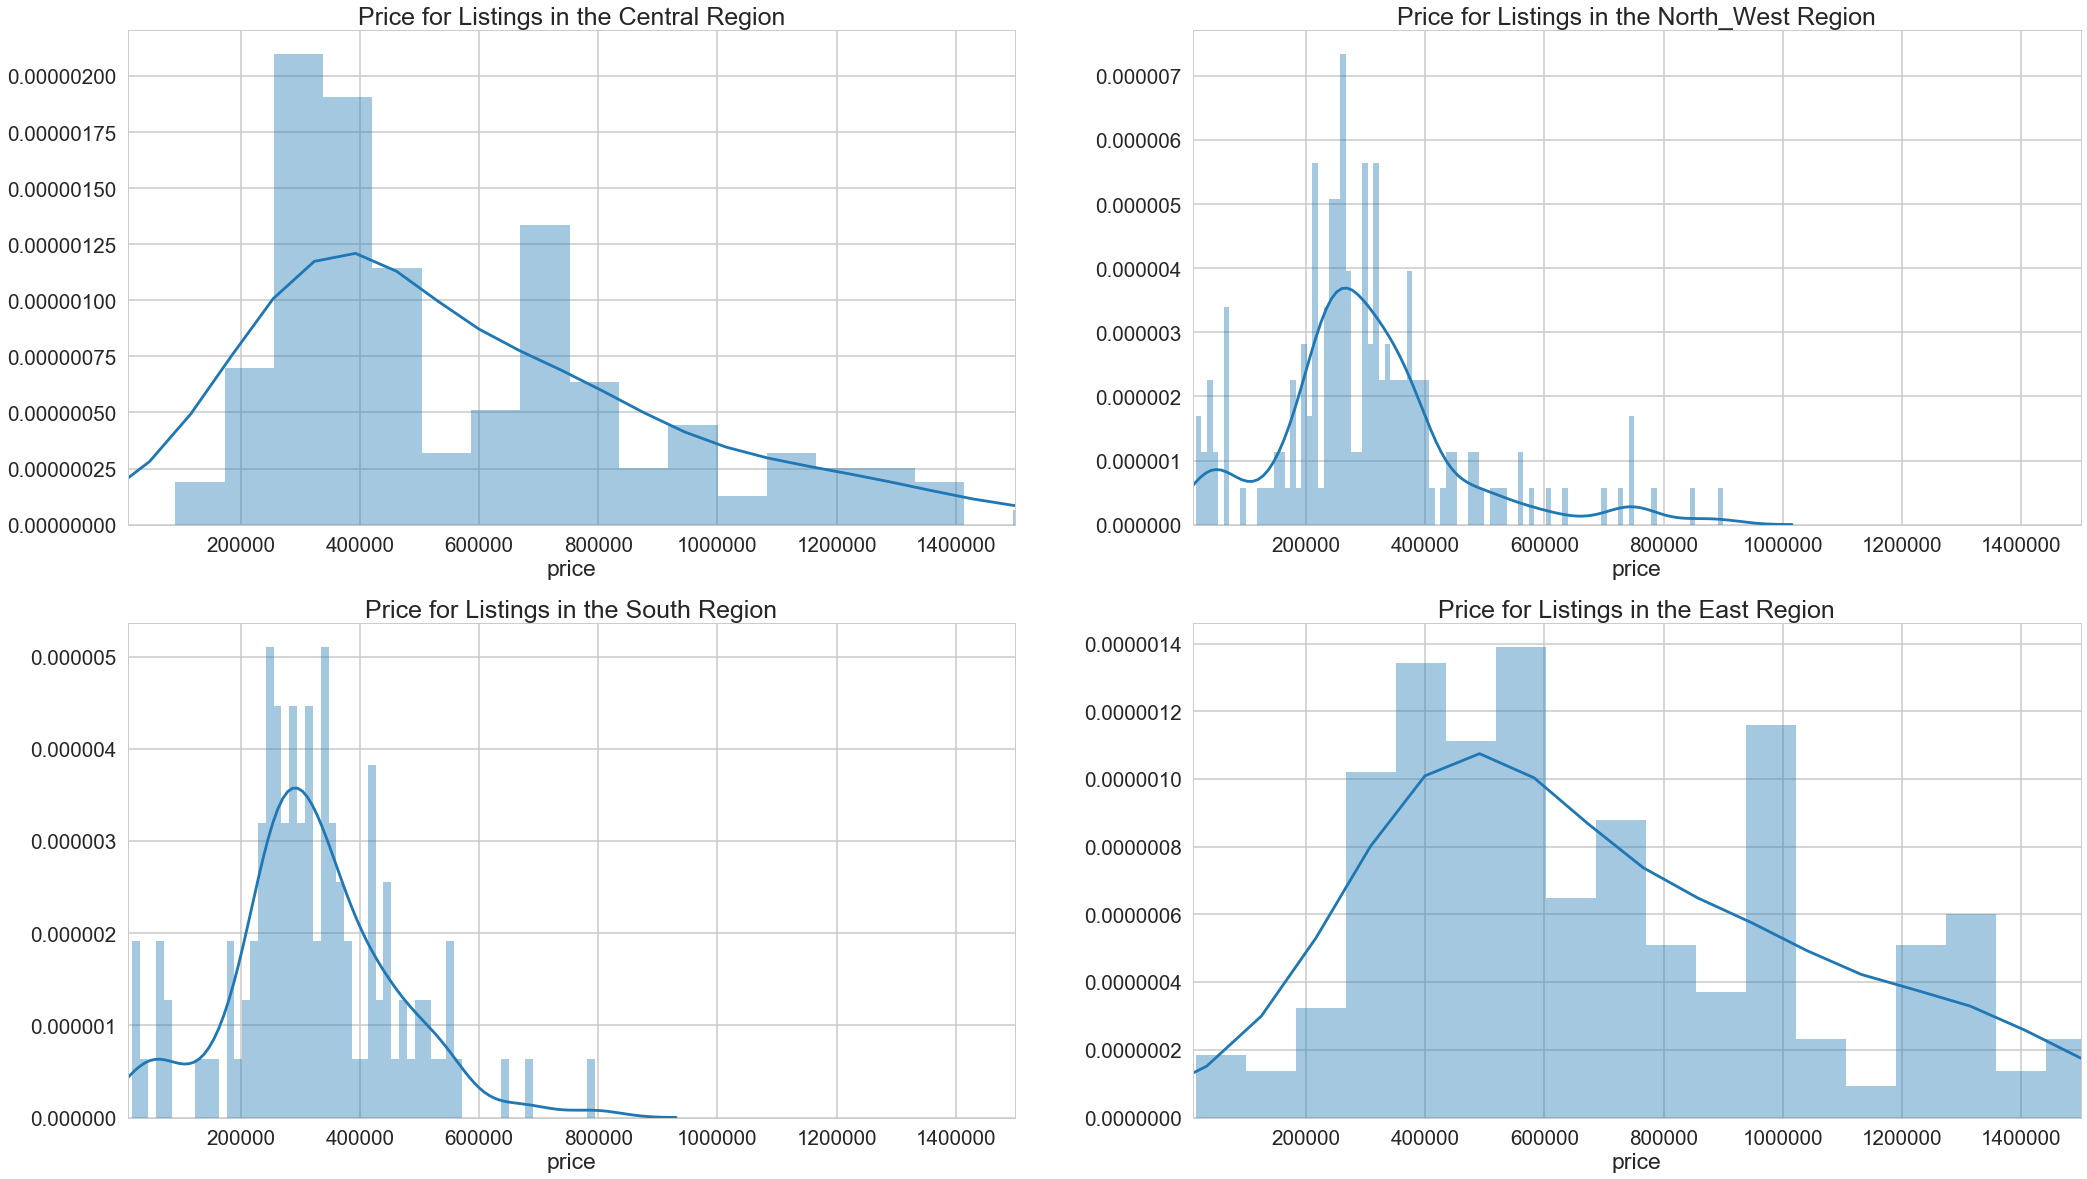

In [260]:
# plotting the price distribution by region

region_list = list(slc_active_listings['region'].unique())

#make the axes fonts bigger
fig = plt.figure(figsize=[35, 20])
sns.set_context("poster", font_scale=1.3)
sns.set_style("whitegrid")

sub_plot_num = 1

for region in region_list:
    region_listings = slc_active_listings[slc_active_listings['region'] == region]
    fig.add_subplot(2,2, sub_plot_num)
    x = .5
    lower = 10000
    upper = 1500000
    bins = int((len(slc_active_listings[slc_active_listings['region']==region]))*x)
    plot1 = region_listings['price']
    sns.distplot(plot1, bins=bins, kde=True)
    plt.title('Price for Listings in the {} Region'.format(region))
    plt.xlim(lower, upper)
    sub_plot_num +=1


Homes in the Central (median ~2069 sqft), North-West (median ~ 1920 sqft), and South (median ~ 1920 sqft) regions  skew smaller than those in the East region (median size ~3417 sqft). The North-West listings show a large number of listings less than 1500 sqft. The Zillow listing 'title' for these homes is 'Home For Sale' (rather than 'House For Sale'), which is curiously the Zillow euphemism for a trailer doublewide and accounts for the large number of very small, very cheap homes in North-West Salt Lake City. The size distribution of East Salt Lake City homes is broad, and the top quartile of homes is larger than 5244 sqft.

The price data shows a similar profile for the geographic regions. The listing prices in Central, North-West, and South regions are more tightly clustered price data than the wide spread East region price data, thought the Central data does have a long right-tail. The median Central listing is \$510,095 (mean = \$865,758), the median East listing is \$643,000 (mean = \$926,170), the median North-West listing is \$282,450 (mean = \$301,464), and the median South listing is \$310,000 (mean = \$320,720).

## Now, small house or large house? Which is it?!?

After an initial exploration of the data, I dug into the small versus large comparisons.

#### Question 1. Are small homes more valuable (per square foot) than large homes?
To address this question, I plotted a bar graph of price per square foot for each of the home size_types (small, medium, and large).

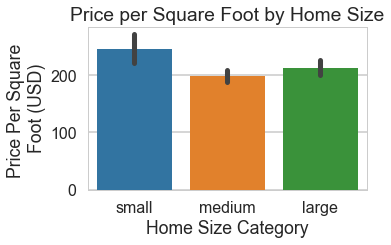

In [261]:
# plotting the price per sqft for the three categories of home_type

fig = plt.figure(figsize=[5, 3])
sns.set_context("poster", font_scale=1)
sns.set_style("whitegrid")

fig.add_subplot(111)   #top
sns.barplot(y="price_per_sqft", x="size_type", 
            data=slc_active_listings).set_title('Price per Square Foot by Home Size')
plt.xlabel("Home Size Category")
plt.ylabel("Price Per Square \nFoot (USD)")

plt.show()

In [262]:
slc_active_listings.groupby('size_type')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
size_type,,,,,,,,
large,349.0,212.187469,119.947188,87.594502,139.157325,185.328346,239.454094,1267.880364
medium,302.0,197.768138,89.439218,21.200000,146.415357,184.468276,233.120165,868.902439
small,105.0,244.843715,135.075406,13.636364,167.950693,233.848954,326.000000,693.576389


The mean price per square foot for a home less than 1200 sqft ('small') is \$244, greater than that of either 'medium' sized homes (\$197) or 'large' homes (\$212). **Relative to their size, small homes are more valuable than large homes**. That was easy! Next I addressed geographic features in the small vs. large comparisons.

#### Question 2: Is a small home downtown really more valuable than a large home in the 'burbs?

I approached this question directly by plotting price per square foot for home size categories in the three geographic regions. The answer to Question 1 also made me curious about whether the 'small homes are more valuable' finding holds up for all neighborhoods, so I addressed this question here as well. 

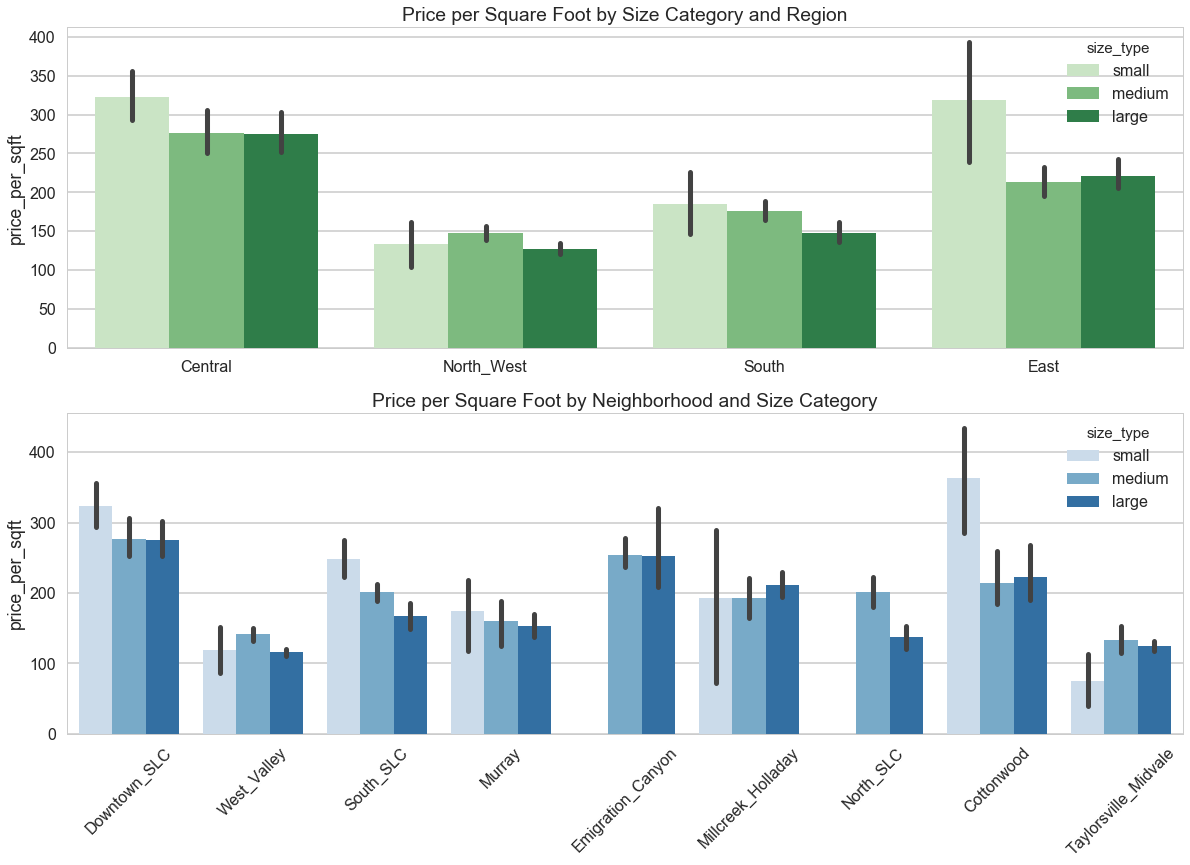

In [279]:
# plotting the price per sqft for the three categories of home_type by neighborhood and region

fig = plt.figure(figsize=[20, 13])
sns.set_context("poster", font_scale=1)
sns.set_style("whitegrid")

fig.add_subplot(212)   #bottom
sns.barplot(y="price_per_sqft", x="neighborhood", hue = 'size_type', palette="Blues",
            data=slc_active_listings).set_title('Price per Square Foot by Neighborhood and Size Category')
plt.xlabel("")
plt.xticks(rotation=45)


fig.add_subplot(211)   #top
sns.barplot(y="price_per_sqft", x="region", hue = 'size_type',
            data=slc_active_listings, palette="Greens").set_title('Price per Square Foot by Region and Size Category')
plt.xlabel("")


plt.show()

To strictly answer my question, **yes, a small home downtown is more valuable (relative to size) than a large house in the suburbs.** The median price per square foot for a small home in Central Salt Lake is \$323 while large homes in East, North-West, and South Salt Lake City are priced at \$222, \$128, and \$148, respectively. 

The price per square foot by neighborhood plot surprised me, however, in that a small home in Central Salt Lake is *not* more valuable (per square foot) than a small home in the fancy Eastern suburb of Cottonwood. In fact, the most valuable asset type in this data set is a small home in Cottonwood, with a median price per square foot of \$364. The 'small homes are more valuable' finding does not hold true for the other East-SLC suburbs nor for the North-West and South suburbs.

#### Question 3: Has the relative value of small urban homes increased more than that of large suburban homes?

The first two questions were straightforward, but this question is a bit more nuanced and required some pre-analysis processing. Since I don't have size data for the historic pricing time series, I wanted to confirm the use of bedroom count and as a proxy for square footage (size). Since both bedroom count and square footage are parametric variables, I calculated a simple Pearson correlation ($\rho$ = 0.575) to confirm that the number of bedrooms and the size of the listing are indeed positively correlated. One and two bedroom properties usually fall below the 'small' category cutoff of 1200 sqft (median size is 759 and 1202 sqft, respectively), and homes with four or more bedrooms usually fall within the 'large' category cutoff of 2500+ sqft (median size is 2696 sqft). Thus, for this analysis 'small' homes will be classified as 1-2 bedrooms and 'large' will be classified as 4 or more bedrooms.

In [105]:
# obtain pearson coefficient for parametric parameters
slc_active_listings[['sqft', 'beds']].corr(method='pearson')

,sqft,beds
sqft,1.000000,0.575311
beds,0.575311,1.000000


To compare price as ZHVI values for different classes of homes (small-downtown, large-suburban, etc), I needed to normalize the data to a contstant value. The absolute ZHVI of a small home downtown may be lower than that of a large suburban home, but I'm interested in how properties have appreciated over time. I normalized the ZHVI at each timestamp to the earliest ZHVI for that given 'home type' (home types are classified as number of bedrooms in a given zip code). 

The historic price data was processed using code in the 'Zillow_SLC_Historic_Data' notebook and saved to a csv file. To see the full processing code refer to the 'Zillow_SLC_Historic_Data' notebook.

In [171]:
# importing the cleaned and parsed csv with historic pricing data

slc_historic_pricing = pd.read_csv('./zillow_slc_historic_prices_processed.csv', 
                           sep=',', index_col=0)

# converting the year-month string to a date time object

slc_historic_pricing['year_month'] = pd.to_datetime(slc_historic_pricing['year_month'], format='%Y-%m', errors='coerce').dropna()


In [172]:
# collapse regions with multiple zip codes/neighborhoods to reflect average value within region

slc_historic_pricing_region = pd.DataFrame(slc_historic_pricing.groupby(['year_month','region', 'beds']).mean())

slc_historic_pricing_region_collapsed = slc_historic_pricing_region.reset_index()

I plotted the normalized ZHVI values for comparable home types in the four geographic regions. Note that data for 1-bedroom homes in East and West Salt Lake is incomplete and inconsistent (likely due to too little data for the ZHVI machine learning model), so I omitted these data from this discussion. A horizontal bar was plotted at the arbitrary value value of 2.25-fold relative increase to make differences in magnitude visually apparent.

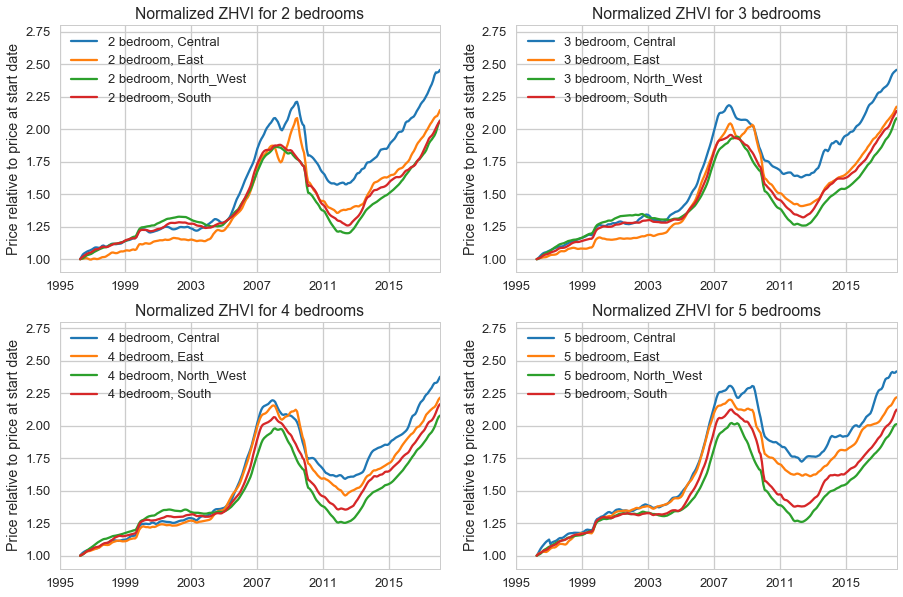

In [276]:
# plot normalized price value across timeseries for all regions; normalized price data
# plotted by bedroom number

# make dict of all combinations of neighborhood/bedrooms
region_list = list(slc_historic_pricing_region_collapsed['region'].unique())
bed_list = list(range(2,6))
bed_region_perms = {k:v for k,v in zip(bed_list, [region_list]*len(bed_list))}

#make the axes fonts bigger
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[15, 10])

sub_plot_num = 1

for bds, rg in bed_region_perms.items():
    beds = bds
    beds_all_region = slc_historic_pricing_region_collapsed[(slc_historic_pricing_region_collapsed['beds'] == 
                                                             beds)].dropna(axis=0, how='any')
    for reg in rg:
        region = reg
        beds_by_region = beds_all_region[beds_all_region['region']==region]
        fig.add_subplot(2, 2, sub_plot_num)
        plt.plot(beds_by_region['year_month'], beds_by_region['price_normalized'], label='{} bedroom, {}'.format(beds, region))
        plt.title('Normalized ZHVI for {} bedrooms'.format(beds))
        plt.ylabel('Price relative to price at start date')
        plt.xlabel('')
        #plt.axhline(y=2.25, color='black', linestyle='--')
        plt.ylim((.9, 2.8)) 
        plt.xlim(datetime.date(1995, 1, 1), datetime.date(2018, 2, 1))
        plt.legend()
    sub_plot_num +=1

All home sizes in the Central region have higher relative ZHVI appreciation than in the 3 suburban regions. During the last housing ‘boom’ (which peaked around 2006), home prices for small/ 2-bedroom homes in the Central region were significantly higher than in other regions, and during the market collapse (2008-2010) small homes in the Central region maintained their value better than other regions and most other property types. Overall, homes in the Central region maintained their value well during the market decline, and this data indicates that any size of home in the Central region is a stable investment.

During 2006-2008 'boom', the all geographic regions exhibited rapid appreciation in ZHVI. During the economic downturn between, however, the magnitude of ZHVI decline for each region differed. Properties in the North-West region of the city appear to have depreciated more as a percentage than in other regions. To confirm this observation, I created a 'volitility-index' that measured the percentage drop in price from the maximum price during the boom to the minimum price during the recession. 

In [227]:
# creating an index of the decline in absolute ZHVI during the 2008 housing crisis (from peak value)

# generating a dicitonary of region and bedroom number combinations
region_list = list(slc_historic_pricing_region_collapsed['region'].unique())
bed_list = list(range(1,6))
region_bed_perms = {k:v for k,v in zip(region_list, [bed_list]*len(region_list))}

# market peak
bubble_start = datetime.date(2006, 1, 1) 
bubble_end = datetime.date(2009, 1, 1)

# market recession
decline_start = datetime.date(2009, 1, 1)
decline_end = datetime.date(2014, 1, 1)

# for each location/bed of home calculate percent decline between max and minumum and save to volitility df
volitility_index_regions = pd.DataFrame()

for rg,bds in region_bed_perms.items():
    region = rg
    for num in bds:
        beds = num
        region_beds = slc_historic_pricing_region_collapsed[(slc_historic_pricing_region_collapsed['region'] == region)
                                                                       &(slc_historic_pricing_region_collapsed['beds'] == beds)].dropna(axis=0, how='any')
        if len(region_beds) > 0:
            max_price = region_beds[(region_beds['year_month'] > bubble_start) &
                                           (region_beds['year_month'] < bubble_end)]['price'].max()
            min_price = region_beds[(region_beds['year_month'] > decline_start) &
                                           (region_beds['year_month'] < decline_end)]['price'].min()
            volitility_index = -((max_price - min_price)/max_price)*100
            row = [region, beds, volitility_index]
            volitility_index_regions = volitility_index_regions.append(pd.Series(row), ignore_index=True,)
            
volitility_index_regions.columns = ['region', 'beds', 'volitility_index']

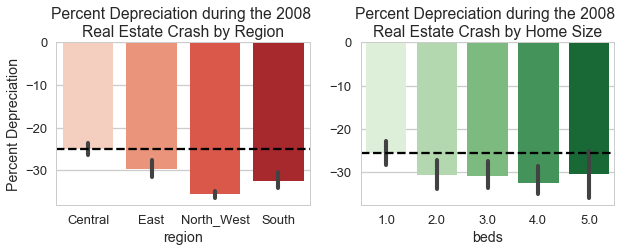

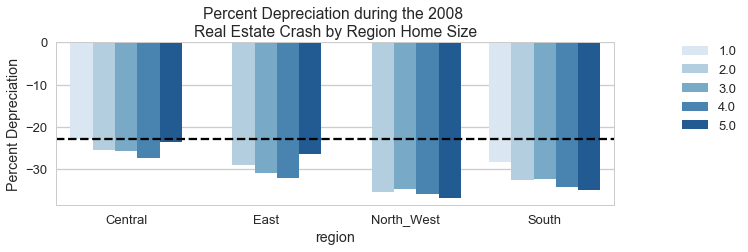

In [267]:
# decline in ZHVI from market peak to valley by region

sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[10,3])

fig.add_subplot(121)
sns.barplot(x="region", y="volitility_index", data=volitility_index_regions, palette="Reds")
plt.title('Percent Depreciation during the 2008 \nReal Estate Crash by Region')
plt.axhline(y=-25, color='black', linestyle='--')
plt.ylabel('Percent Depreciation')

# decline in ZHVI from market peak to valley by bed number

fig.add_subplot(122)
sns.barplot(x="beds", y="volitility_index", data=volitility_index_regions, palette="Greens")
plt.title('Percent Depreciation during the 2008 \nReal Estate Crash by Home Size')
plt.axhline(y=-25.6, color='black', linestyle='--')
plt.ylabel('')

fig = plt.figure(figsize=[10,3])
sns.barplot(x="region", y="volitility_index", hue='beds', data=volitility_index_regions, palette="Blues")
plt.title('Percent Depreciation during the 2008 \nReal Estate Crash by Region Home Size')
plt.axhline(y=-22.8, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('Percent Depreciation')


plt.show()

During the 2008-2010 market collapse, the value of small urban homes declined the least (-22.8%) and large suburban homes in the North-West region declined the most (-36.7% for 5+ bedrooms). Homes of all sizes in the Central region maintained value better than in other regions, with an average decline of just 25.0% compared to 29.6% in the East region, 35.7% in the North-West region, and 32.5% in the South region. 

Small urban homes maintain their value better than large suburban homes in a volitile market, but how does their relative appreciation compare? To answer this question I plotted normalized ZHVI for small homes downtown versus large homes in each of the three suburban regions.

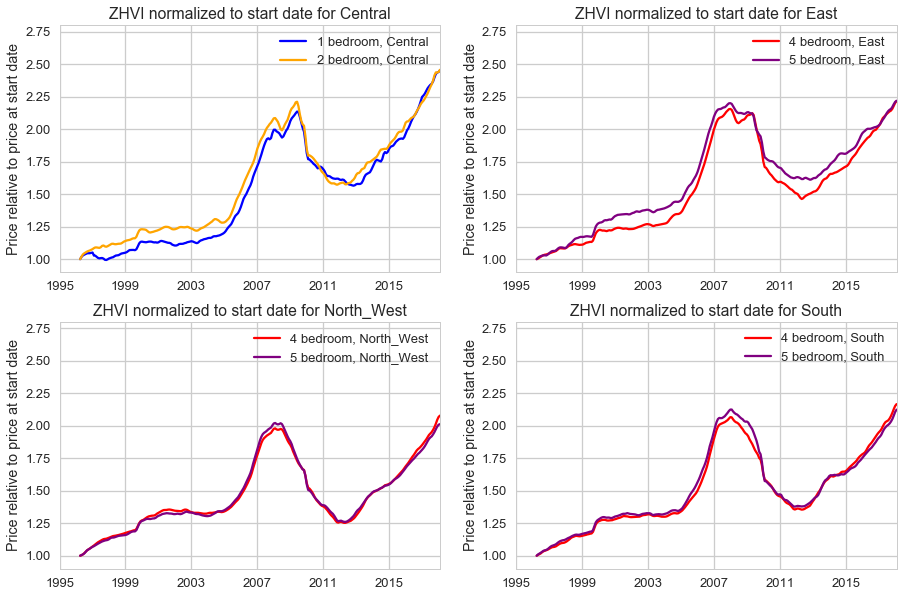

In [278]:
# plot normalized price value across timeseries for urban small homes and suburban large homes

# make dict of all combinations of neighborhood/bedrooms
region_bed_perms_filtered = {'Central': [1, 2],
 'East': [4, 5],
 'North_West': [4, 5],
 'South': [4, 5]}

#make the axes fonts bigger
sns.set_context("talk")
sns.set_style("whitegrid")
fig = plt.figure(figsize=[15, 10])
sub_plot_num = 1

for rg,bds in region_bed_perms_filtered.items():
    region = rg
    region_all_beds = slc_historic_pricing_region_collapsed[(slc_historic_pricing_region_collapsed['region'] == 
                                                             region)].dropna(axis=0, how='any')
    fig.add_subplot(2,2, sub_plot_num)
    for num in bds:
        beds = num
        region_num_beds = region_all_beds[region_all_beds['beds']==num]
        col=['blue', 'orange', 'green', 'red', 'purple']
        plt.plot(region_num_beds['year_month'], region_num_beds['price_normalized'], color= col[num-1], label='{} bedroom, {}'.format(num, region))
        plt.title('ZHVI normalized to start date for {}'.format(region))
        plt.ylabel('Price relative to price at start date')
        plt.xlabel('')
        plt.ylim((.9, 2.8)) 
        plt.xlim(datetime.date(1995, 1, 1), datetime.date(2018, 2, 1))
        plt.legend()
    sub_plot_num +=1

This data shows that in addition to being a less volitile investment, the relative value of small urban homes has appreciated more than that of large suburban homes, particularly in less desirable neighborhoods like North-West and South Salt Lake City. The 2018 data shows small homes at their highest valuation since 1996, while large suburban homes are appreciated to roughly the same valuation as during the 2006-2008 bubble.

Back to our original question: is it better to own a small home downtown than a large home in the suburbs? The answer undoubtably depends on the specific suburb and the market trajectory, but in the context of Salt Lake City and the current market boom I will give this question a **'probably' yes**. Small urban homes are rapidly appreciating and are likely to maintain value well in the next downturn.

## Summary

* Are small homes more valuable (per square foot) than large homes?
    
    **Yes.**
    
    
* Is a small home downtown really more valuable than a large home in the 'burbs? 
    
    **Yes, but surprisingly a small home in a fancy suburb is worth more!**


* Has the relative value of small urban homes increased more rapidly than that of larger suburban homes?
    
    **Probably yes. During this current market bubble, small urban homes have appreciated to their highest value since 1996 and surpassed the relative appreciation of large suburban homes. Additionally, price behavior in past downturns indicate that urban homes (small and otherwise) maintain their value better than other property types during market corrections.** 
    

These findings are mixed for the small house people. Small urban homes do hold their value well and in the current market are appreciating quickly, but for prospective buyers small homes come with a high price per square foot. I am satisfied that small urban homes are a stable investment, but I suppose I'll have to keep an open mind about Salt Lake City's eastern suburbs.

## Limitations and Further Exploration

One of the major limitations of this analysis comes from the nature of the price data. The active listing price is not the actual sale price, which could be lower. Similarly the ZHVI in the historical data is not an actual sale price, but is partially derived from past sales. Ultimately, obtaining the actual price from recent and historical transactions would be a more robust method of determining valuation. In California this information is available publically, but most states (including Utah) don't make this information public. 

Another limitation in the data is the incompleteness of the historical data. The data was not available for all of the Salt Lake City ZIP codes of interest (like the Cottonwood suburb), leaving some ambiguity in the historical price data and making it difficult to compare directly to the current listing data.

There is room for a good deal of expansion with this analysis. Though the historical price data was normalized, the actual year-over-year rate of change was not calculated. An interesting future analysis would be to calculate the rate of value change each year and identify regions and home types with notable trajectories. Further home type categories could be added to this exploration, and category classifiers could include condo/ single family, the age of the home, the lot size, and neighborhood demographic features.